# Extracting and Visualizing Stock Data

## Description

We´ll extract some stock data, then, we´ll display this data in a graph.

In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [ ]:
# let´s import all the necessary libraries

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, we can ignore warnings using the warnings module. You can use the filterwarnings functions to filter or ignore specific warnings messages or categories.

In [ ]:
# let´s import the library
import warnings

## let´s ignore all the warnings
warnings.filterwarnings('ignore',category=FutureWarning)

### Define Graphing Function

The function is called 'make_graph'. It has three inputs.

In [75]:
# let´s build the function 'make_graph'

def make_graph(stock_data,revenue_data,stock):
    fig = make_subplots(rows=2,cols=1,shared_xaxes=True,subplot_titles=('Historical Share Price','Historical Revenue'),vertical_spacing=.3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021--04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date,infer_datetime_format=True),y=stock_data_specific.Close.astype('float'),name='Share Price'),row=1,col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date,infer_datetime_format=True),y=revenue_data_specific.Revenue.astype('float'),name='Revenue'),row=1,col=1)
    fig.update_xaxes(title_text='Date',row=1,col=1)
    fig.update_xaxes(title_text='Date',row=2,col=1)
    fig.update_yaxes(title_text='Price ($US)',row=1,col=1)
    fig.update_yaxes(title_text='Revenue ($US Millions)',row=2,col=1)
    fig.update_layout(showlegend=False,
                     height=900,
                     title=stock,
                     xaxis_rangeslider_visible=True
                     )
    fig.show()


# **Question 1: Use yfinance to Extract Stock Data**

Using the *Ticker* function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its symbol is TSLA.

In [ ]:
# here we create the object Ticker 

tesla = yf.Ticker('TSLA')

In [ ]:
type(tesla)

In [ ]:
# then, we use the method history to extract stock information setting the
# parameter period to max

tesla_data = tesla.history(period='max')

In [ ]:
# it´s a dataframe
type(tesla_data)

In [ ]:
# here we see the last rows of the df

tesla_data.tail()

In [ ]:
# here we see the first rows of the df

tesla_data.head()

Now we have to **reset the index** using the reset_index(inplace=True) function on the tesla_data DataFrame and show the first rows.

In [ ]:
# let´s reset the index

tesla_data.reset_index(inplace=True)

In [ ]:
# here we see the first rows of the dataframe after resetting the index

tesla_data.head()

We can see that the function **reset_index** includes a new column to the df called '**index**'.

# **Question 2: Use Webscraping to Extract Tesla Revenue Data**

Use the requests library to download the following webpage:
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm
Save the text of the response as a variable named **html_data**.

In [ ]:
# let´s save the text as html file
import requests
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html = requests.get(url,'html5lib')

type(html)

In [ ]:
# in this part we save the response which is a type of 'Response' to
# a text in a html format which finally it´s a string.

html_data = html.text

type(html_data)

In this part, we´ll parse the html data using **beautiful_soup**. To do this, firstly, we´ll import the respective libraries. 

In [ ]:
from bs4 import BeautifulSoup

Then, we´ll parse the **HTML** stored as a string, that is, the variable ***html_data***. Let´s use the method BeautifulSoup(...,...)

In [ ]:
html_soup = BeautifulSoup(html_data,'html.parser')

In [ ]:
type(html_soup)

Let´s find all the ***html*** tables in that website.

In [ ]:
tables = html_soup.find_all('table')

tables

In [ ]:
len(tables)

From above we can see that there are 6 tables in the webpage.

As we´re looking for one specific table called 'Tesla Revenue', we´ll extract the table with the name **Testa Revenue**.

In [ ]:
# let´s use the loop for to find the index number of the table which might 
# contain the desired table called 'Tesla Revenue'

for index,table in enumerate(tables):
    if ('Tesla Annual Revenue' in str(table)):
        table_index_ = index

print(table_index_)

From the above result we can see that the desired table is in the index number 0. With the following code we´ll obtain the desired table.

In [ ]:
tables[table_index_]

In [ ]:
type(tables[table_index_])

Now, we construct a DataFrame with the following columns: **Date** and **Revenue**. Its name will be **tesla_revenue**.

In [ ]:
tesla_revenue = pd.DataFrame(columns=['Date','Revenue'])

tesla_revenue

Which is actually empty. In this part, we´ll get all the rows of the table 'Tesla Annual Revenue'.

In [ ]:
for row in tables[table_index_].tbody.find_all('tr'):
    print(row)

In this part, we´ll get all the columns of the table 'Tesla Annual Revenue'.

In [ ]:
for col in tables[table_index_].tbody.find_all('td'):
    print(col)

Now, we´ll put all the data found in the table html to the reciently created df called 'tesla_revenue'.

In [ ]:
for row in tables[table_index_].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({'Date':date,'Revenue':revenue},ignore_index=True)

tesla_revenue

Now, we´ll remove the comma and dollar sign from the *Revenue* column.

In [ ]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$','')

tesla_revenue

With the following code we´ll remove an null or empty strings in the Revenue column.

In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']

tesla_revenue

Now, we´ll display the last 5 rows of the **tesla_revenue** dataframe using the tail function. And finally, we´ll take a screenshot of the results.

In [ ]:
tesla_revenue.tail()

# **Question 3: Use yfinance to Extract Stock Data**

Now, we´ll create a Ticker object. The symbol is GME.

In [ ]:
gme = yf.Ticker('GME')

type(gme)

Now, let´s extract the stock information through the function **history**. Firstly, we create a dataframe called ***gme_data***.

In [ ]:
gme_data = pd.DataFrame()

Then, we use the function *history*.

In [ ]:
gme_data = gme.history(period='max')

In [ ]:
type(gme_data)

In [ ]:
gme_data

In the above table we can see the historical information about the stocks of GME. Now, we reset the index.

In [ ]:
gme_data.reset_index(inplace = True)

gme_data

We´ll get the first rows of the dataframe.

In [ ]:
gme_data.head()

# **Question 4: Use Webscraping to Extract GME Revenue Data**

Let´s use the requests library.

In [52]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

html = requests.get(url)

In [53]:
type(html)

requests.models.Response

In [54]:
html_data = html.text


In [55]:
type(html_data)

str

In [ ]:
html_soup = BeautifulSoup(html_data,'html.parser')

html_soup

In [ ]:
tables = html_soup.find_all('table')

tables

In [58]:
for index,table in enumerate(tables):
    if ('GameStop Annual Revenue' in str(table)):
        table_index = index

print(table_index)

0


In [59]:
# let´s create the dataframe called 'gme_revenue'

gme_revenue = pd.DataFrame(columns=['Date','Revenue'])

gme_revenue

,Date,Revenue


In [60]:
for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        date = col[0].text
        revenue = col[1].text
        gme_revenue = tesla_revenue.append({'Date':date,'Revenue':revenue},ignore_index=True)

gme_revenue

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


Let´s remove the dollar and comma.

In [61]:
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$','')

gme_revenue

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


Now, it´s clean.

In [62]:
gme_revenue.tail()

,Date,Revenue
9,2012,413
10,2011,204
11,2010,117
12,2009,112
13,2005,1843


# **Question 5: Plot Tesla Stock Graph**

Let´s use the make_graph function to graph the Tesla Stock Data. Let´s make the call.

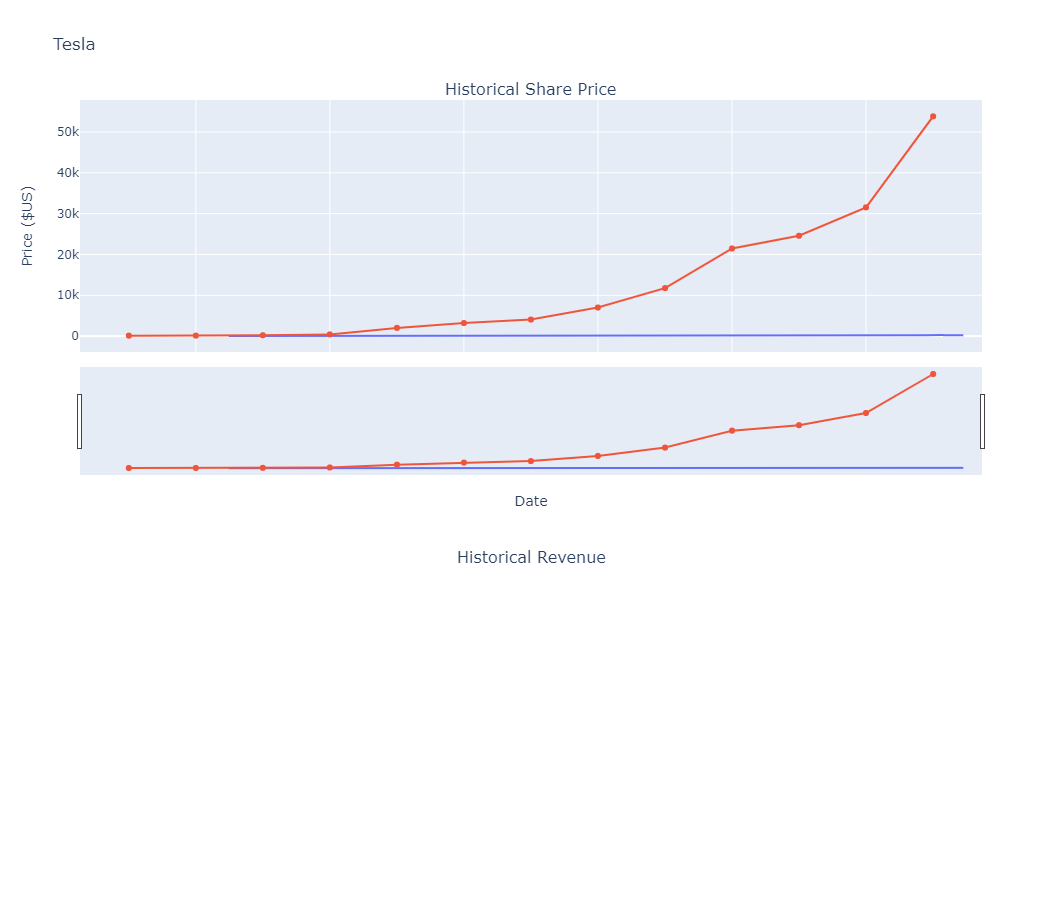

In [76]:
make_graph(tesla_data,tesla_revenue,'Tesla')

#make_graph

# **Question 6: Plot GameStop Stock Graph**

Let´s use the make_graph function to graph the GameStop Stock Data. Let´s make the call.

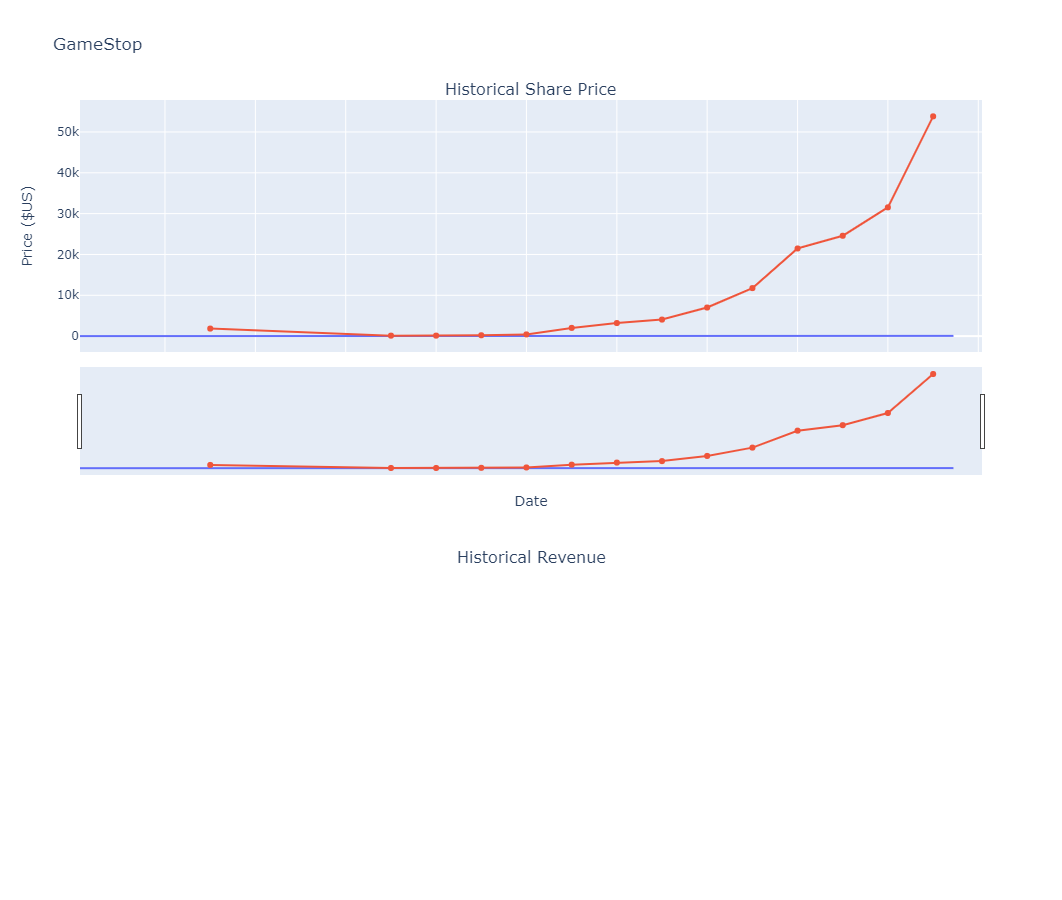

In [77]:
make_graph(gme_data,gme_revenue,'GameStop')